In [1]:
import warnings
warnings.simplefilter(action ="ignore")
warnings.filterwarnings('ignore')
from collections import Counter
# Import the necessary packages
import numpy as np
import pandas as pd
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, Binarizer ###########
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, auc
import pickle

In [2]:
# Load Dataset
data = pd.read_csv('data/fetal_health.csv')
# previewing the DataFrame
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
data = data.rename(columns = {'baseline value':'baseline_value', 
                              'abnormal_short_term_variability':'percentage_of_time_with_abnormal_short_term_variability',
                              'prolongued_decelerations': 'prolonged_decelerations'})

In [4]:
# engineering new categorical target column for Normal and At Risk fetal health
data.loc[data['fetal_health']==1.000, 'fh_outcome'] = 'Normal'
data.loc[data['fetal_health']==2.000, 'fh_outcome'] = 'Risk'
data.loc[data['fetal_health']==3.000, 'fh_outcome'] = 'Risk'
data = data.drop(columns='fetal_health', axis=1)
data.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,percentage_of_time_with_abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,Risk
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,Normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,Normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,Normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,Normal


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   baseline_value                                           2126 non-null   float64
 1   accelerations                                            2126 non-null   float64
 2   fetal_movement                                           2126 non-null   float64
 3   uterine_contractions                                     2126 non-null   float64
 4   light_decelerations                                      2126 non-null   float64
 5   severe_decelerations                                     2126 non-null   float64
 6   prolonged_decelerations                                  2126 non-null   float64
 7   percentage_of_time_with_abnormal_short_term_variability  2126 non-null   float64
 8   mean_value_of_short_term_var

<AxesSubplot:xlabel='fh_outcome', ylabel='count'>

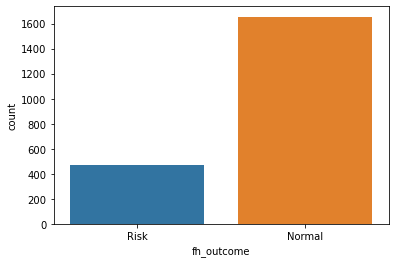

In [6]:
sns.countplot(x = 'fh_outcome', data = data)

In [7]:
# setting target and features
y = data['fh_outcome']
X = data.drop(columns='fh_outcome')
# splitting the data into train and test sets
# using stratify parameter to make sure class ratios 
# are distributed evenly across train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

In [8]:
y_train

468       Risk
123     Normal
1099    Normal
1804    Normal
381     Normal
         ...  
1370      Risk
1926    Normal
410       Risk
1449    Normal
229     Normal
Name: fh_outcome, Length: 1488, dtype: object

In [9]:
Lb = LabelEncoder()
Lb.fit(y_train)
y_train = Lb.transform(y_train)
y_test = Lb.transform(y_test)

In [10]:
# Fit SMOTE to training data
from imblearn.over_sampling import SMOTE
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train) 

## Build Pipeline

In [12]:
pipe_SVM = Pipeline([
                     ('Scl', StandardScaler()),
                     ('Svm', SVC())
                    ])

In [13]:
param_grid_SVM = [{"Svm__C":[0.5,1,2,3,5], 
                   "Svm__tol":[0.001,0.0001,0.00001],
                   "Svm__kernel":['linear','rbf','poly'],
#                   "Svm__gamma":['scale','auto',0.1,0.01,0.001,0.0001]
                  }]

In [14]:
GridSearchCV_SVM = GridSearchCV(estimator=pipe_SVM, 
                                param_grid=param_grid_SVM, 
                                cv=10,
                                verbose=1, 
                                n_jobs=-1,
                                scoring = 'recall',
                                return_train_score=True
                                )

In [15]:
grid = GridSearchCV_SVM.fit(X_train_resampled,y_train_resampled)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    7.2s finished


In [16]:
grid.score(X_test, y_test)

0.9432624113475178

In [17]:
y_pred_train = grid.predict(X_train_resampled)
y_pred = grid.predict(X_test)

In [18]:
print(classification_report(y_train_resampled, y_pred_train))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.95      1158
           1       0.91      0.99      0.95      1158

    accuracy                           0.95      2316
   macro avg       0.95      0.95      0.95      2316
weighted avg       0.95      0.95      0.95      2316

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       497
           1       0.71      0.94      0.81       141

    accuracy                           0.90       638
   macro avg       0.85      0.92      0.87       638
weighted avg       0.92      0.90      0.91       638



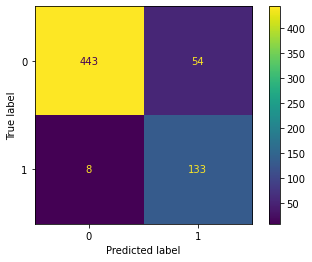

In [19]:
# plotting confusion matrix
plot_confusion_matrix(grid, X_test, y_test)
plt.show()

Onehotencoder()/Labelencoder()/imputer()